In [1]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 4.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 KB 8.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 6.8 MB/s eta 0:00:0000:0100:01


In [2]:
%pip install mne

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 1.8 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 3.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 KB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 1.3 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 KB 1.3 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 KB 3.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 468.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 M

Opening raw data file /mnt/d/ICASSP Grand Challenge SP/eremus_dataset/pruned/train/1036331628_eeg.fif...
    Range : 31864 ... 42086 =    248.938 ...   328.797 secs
Ready.
Reading 0 ... 10222  =      0.000 ...    79.859 secs...


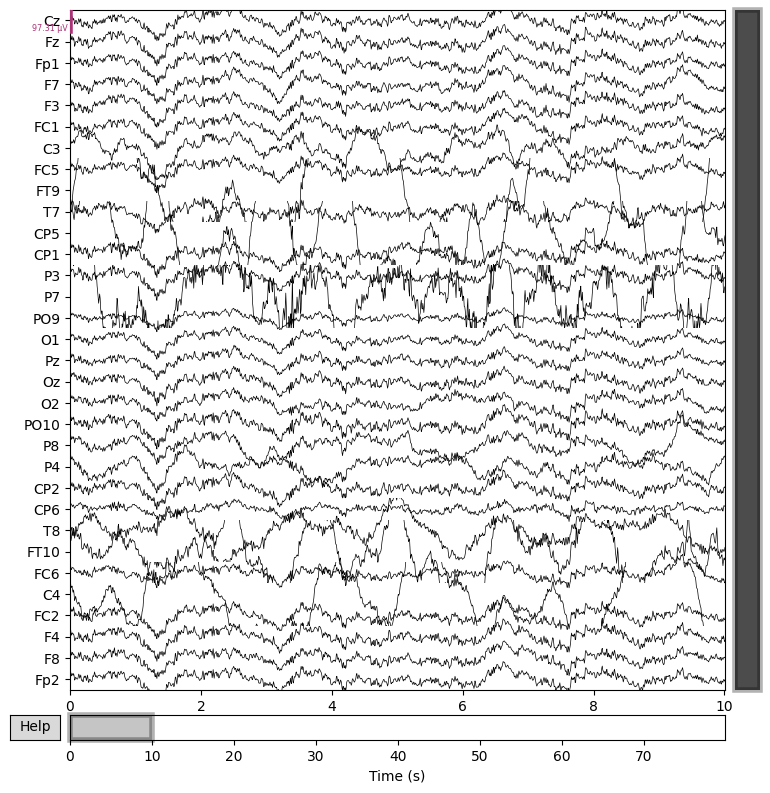

In [5]:
import mne
import matplotlib.pyplot as plt

# Path to the .fif file
fif_file = '/mnt/d/ICASSP Grand Challenge SP/eremus_dataset/pruned/train/1036331628_eeg.fif'

# Load the EEG data from the .fif file
raw = mne.io.read_raw_fif(fif_file, preload=True)

# Set up the layout for visualization (optional)
layout = mne.channels.find_layout(raw.info)

# Plot the raw EEG data
fig = raw.plot(n_channels=32, scalings='auto', show=False)

# Save the plot as an image file
# fig.savefig('eeg_visualization.png')

# Display the plot (optional)
plt.show()


In [6]:
raw

<Raw | 1036331628_eeg.fif, 32 x 10223 (79.9 s), ~2.5 MB, data loaded>

Opening raw data file /mnt/d/ICASSP Grand Challenge SP/eremus_dataset/pruned/train/1036331628_eeg.fif...
    Range : 31864 ... 42086 =    248.938 ...   328.797 secs
Ready.
Reading 0 ... 10222  =      0.000 ...    79.859 secs...
Opening raw data file /mnt/d/ICASSP Grand Challenge SP/eremus_dataset/pruned/train/1036331628_eeg.fif...
    Range : 31864 ... 42086 =    248.938 ...   328.797 secs
Ready.
Reading 0 ... 10222  =      0.000 ...    79.859 secs...


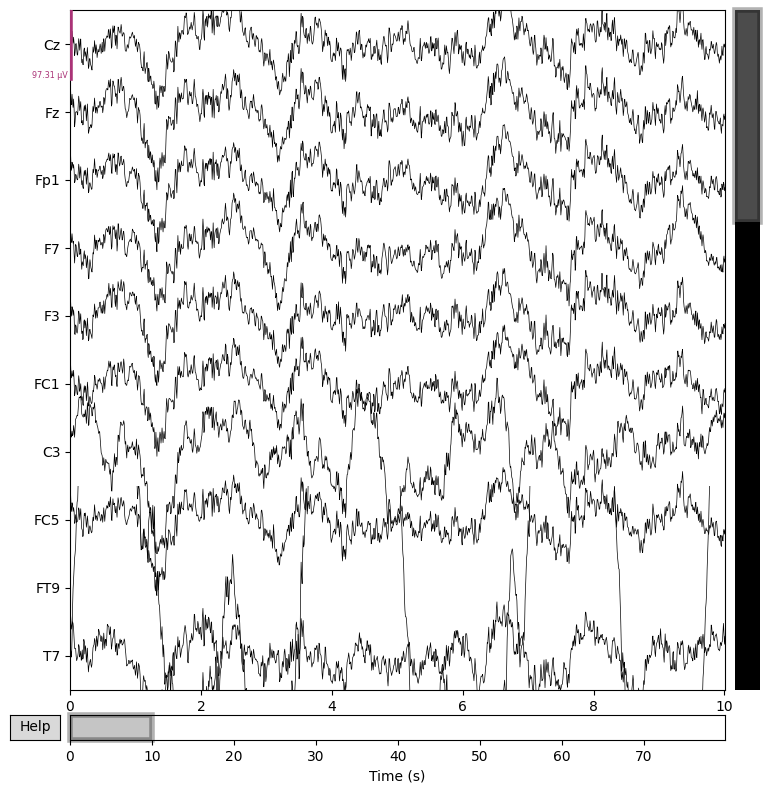

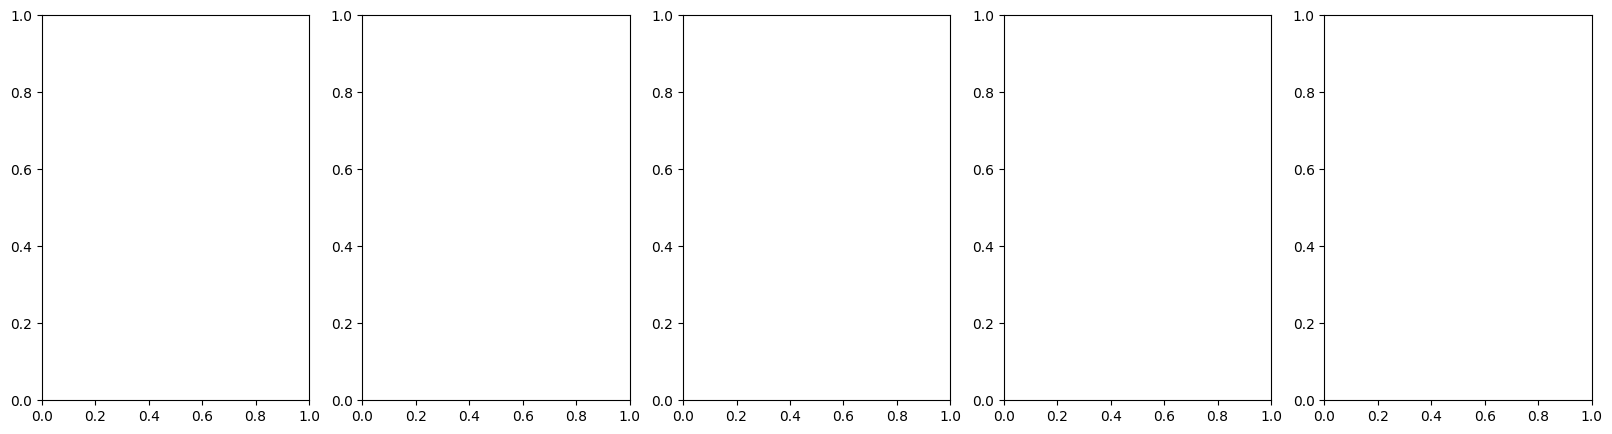

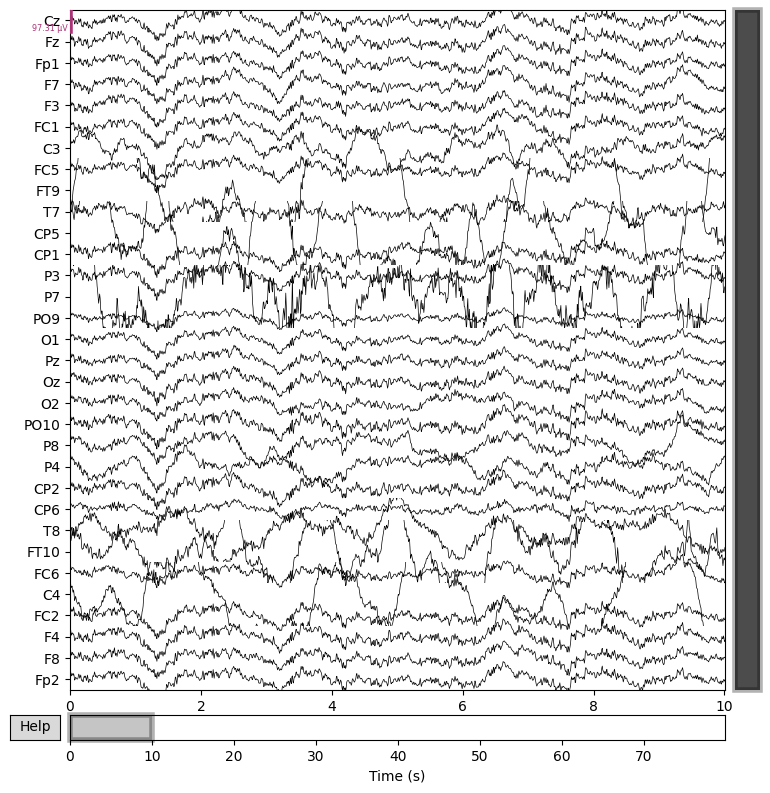

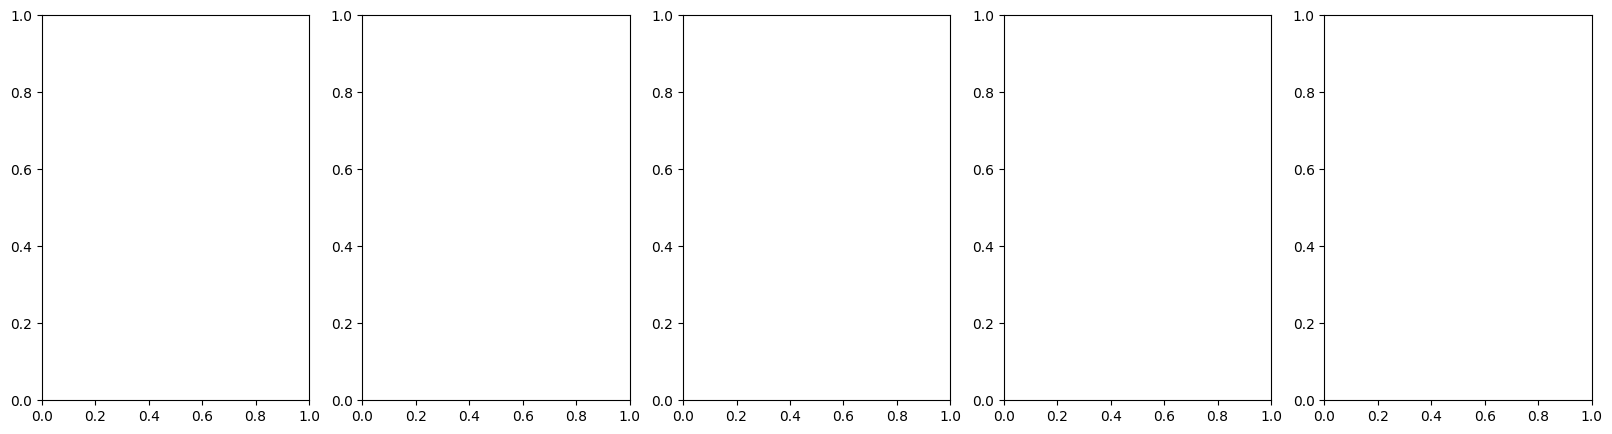

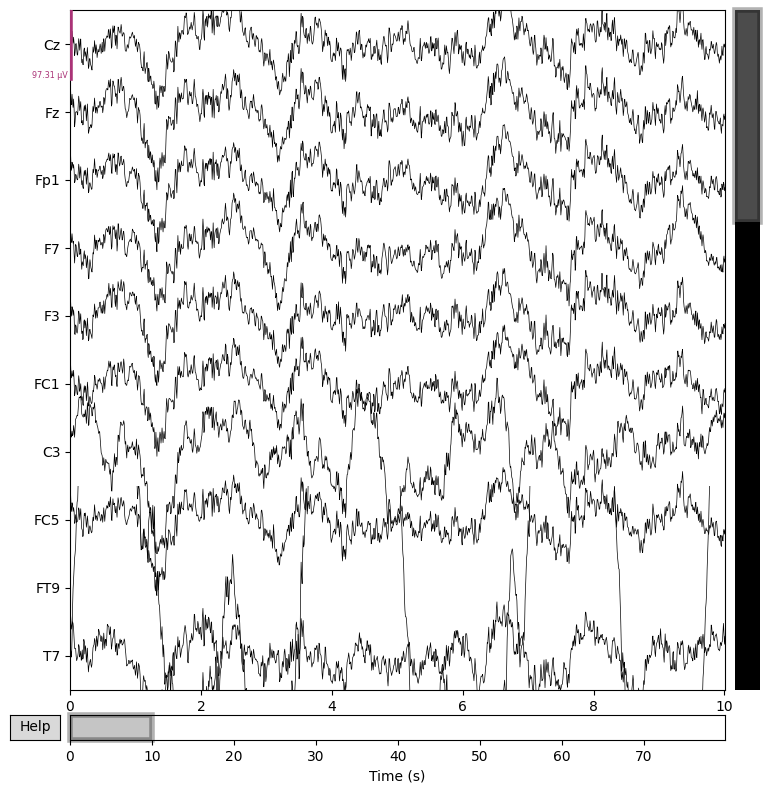

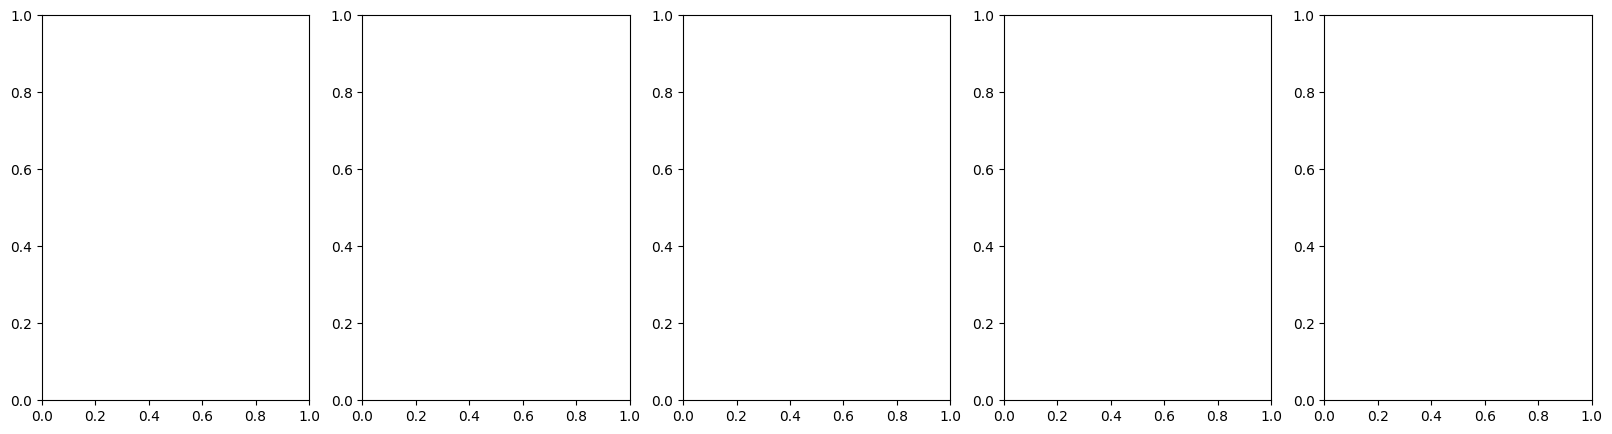

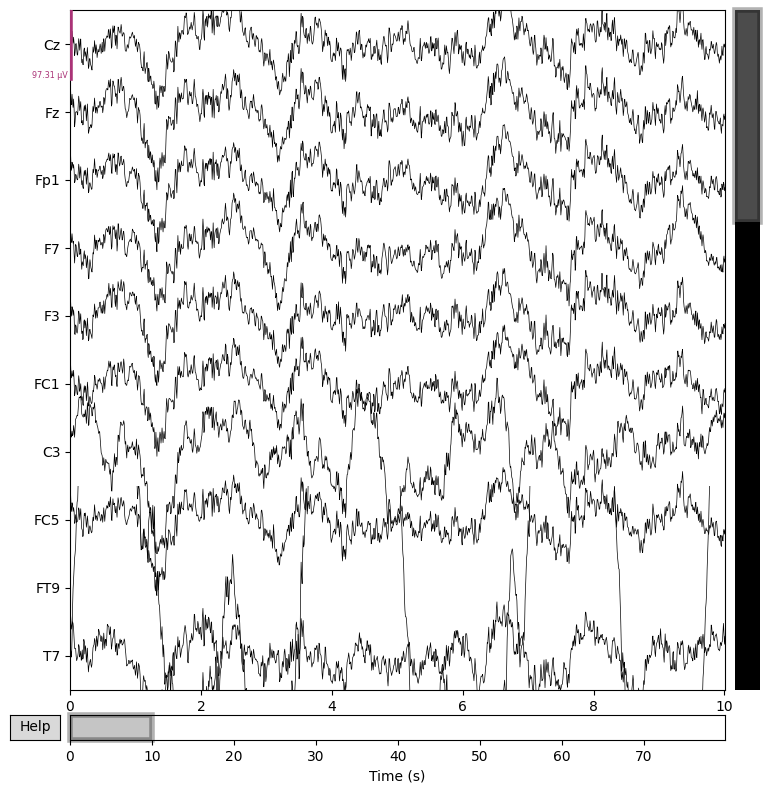

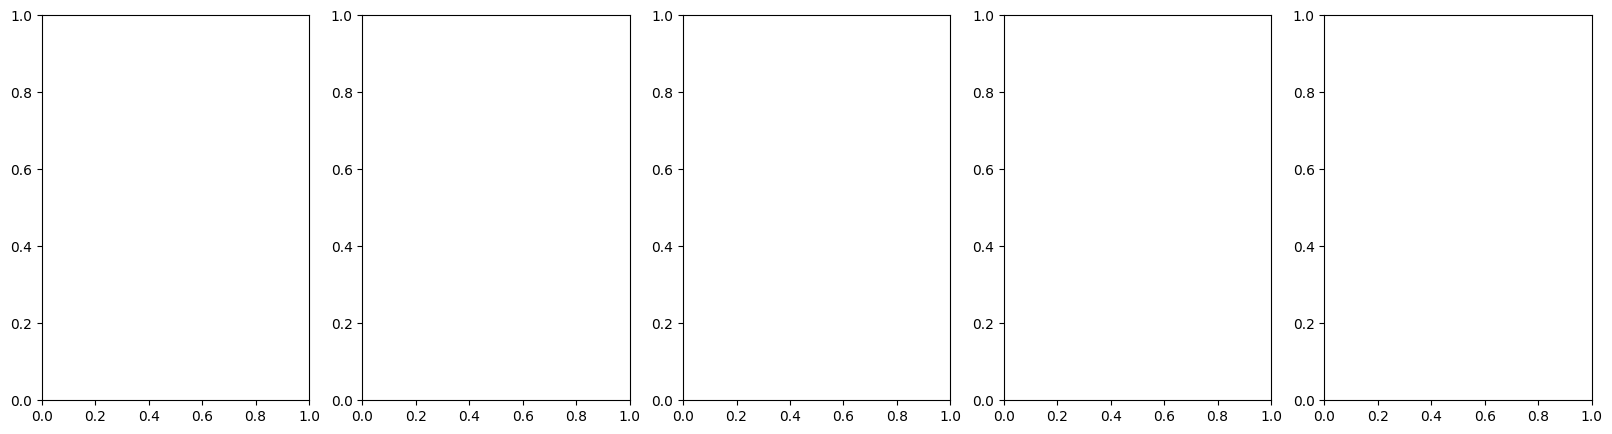

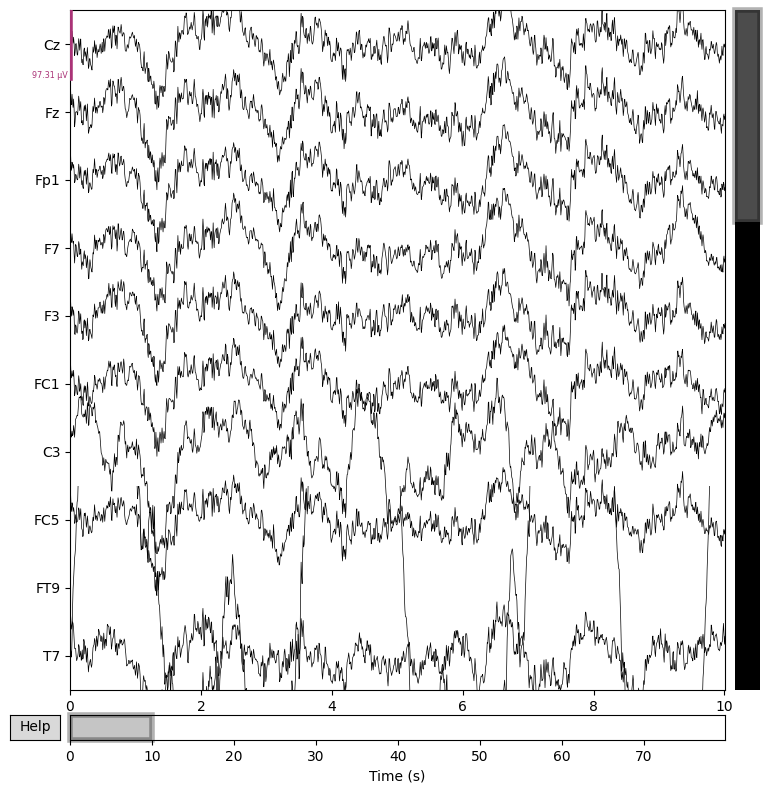

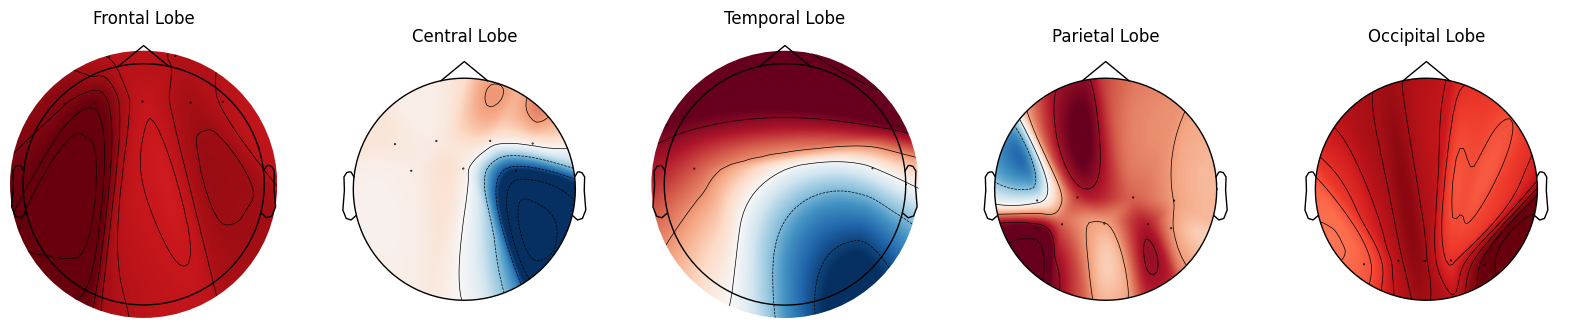

In [11]:
import mne
import matplotlib.pyplot as plt
import numpy as np
# Path to the .fif file
fif_file = '/mnt/d/ICASSP Grand Challenge SP/eremus_dataset/pruned/train/1036331628_eeg.fif'

# Load the EEG data from the .fif file
raw = mne.io.read_raw_fif(fif_file, preload=True)
raw = mne.io.read_raw_fif(fif_file, preload=True)

# Define the lobes based on your provided 32-channel EEG system
lobes_mapping = {
    'Frontal': ['Fp1', 'Fp2', 'Fz', 'F7', 'F3', 'F4', 'F8'],
    'Central': ['Cz', 'C3', 'C4', 'FC1', 'FC2', 'FC5', 'FC6'],
    'Temporal': ['T7', 'T8', 'FT9', 'FT10'],
    'Parietal': ['Pz', 'P3', 'P4', 'P7', 'P8', 'CP1', 'CP2', 'CP5', 'CP6'],
    'Occipital': ['O1', 'O2', 'Oz', 'PO9', 'PO10']
}

# Set EEG montage (standard electrode positions for 32 channels)
raw.set_montage('standard_1020')

# Plot raw EEG data with 10 channels visible
fig1 = raw.plot(n_channels=10, scalings='auto', show=False)

# Save the EEG plot
fig1.savefig('eeg_raw_plot.png')

# Now, plot the topomap for specific lobes (using average activity for a specific time range)
times = [0, 5, 10]  # Example: Plot topomap for these time points

fig2, axes = plt.subplots(1, len(lobes_mapping), figsize=(20, 5))

# Loop through lobes and plot the corresponding sensors
for idx, (lobe, channels) in enumerate(lobes_mapping.items()):
    # Pick the channels for the lobe
    picks = mne.pick_channels(raw.info['ch_names'], channels)
    
    # Check if the selected picks match the available channels in raw data
    if len(picks) == 0:
        print(f"No channels found for {lobe} Lobe. Skipping...")
        continue
    
    # Get the average activity over time for the selected channels
    data = raw.get_data(picks=picks)
    avg_data = np.mean(data, axis=1)

    # Create a copy of the raw info to match the picked channels
    info_copy = mne.pick_info(raw.info, picks)

    # Plot the topomap for the selected lobe
    mne.viz.plot_topomap(avg_data, info_copy, axes=axes[idx], show=False)
    axes[idx].set_title(f'{lobe} Lobe')

# Save the topomap plot
plt.savefig('eeg_lobes_topomap_32_channels_custom.png')

# Display the plots
plt.show()


In [15]:
import pandas as pd
df = pd.read_json('/mnt/d/ICASSP Grand Challenge SP/eremus_dataset/splits_emotion_recognition.json')

ValueError: All arrays must be of the same length

In [49]:
import json

with open('/mnt/d/ICASSP Grand Challenge SP/eremus_dataset/splits_subject_identification.json') as f:
    data = json.load(f)

# Inspect the first few entries
print(data)


{'train': [{'spotify_track_id': '06s6aloy62vytl3MnT6gfl', 'song_title': 'Times Like These - Live at the Pantages Theatre, Los Angeles, CA - August 2006', 'label': 0, 'emotion': 'Amusement', 'session_type': 'personal', 'subject_id': 23, 'id': 3784258358, 'song_author': ['Foo Fighters']}, {'spotify_track_id': '0h9fnCSnbUgOEgibnQByFv', 'song_title': 'Everyday Life', 'label': 2, 'emotion': 'Disappointment', 'session_type': 'personal', 'subject_id': 23, 'id': 2395445698, 'song_author': ['Coldplay']}, {'spotify_track_id': '1iArQTuOzxvrtniGmkyy92', 'song_title': 'Burden In My Hand', 'label': 3, 'emotion': 'Anger', 'session_type': 'personal', 'subject_id': 23, 'id': 3049220457, 'song_author': ['Soundgarden']}, {'spotify_track_id': '3A9vIxzGBjEfqmDK7H9exS', 'song_title': 'Pyramid Song', 'label': 3, 'emotion': 'Fear', 'session_type': 'personal', 'subject_id': 23, 'id': 2667905835, 'song_author': ['Radiohead']}, {'spotify_track_id': '39kHMfF3dBMZMbOtoit1XF', 'song_title': 'On The Mend', 'label': 

In [50]:
import pandas as pd

# If the structure is a list of dictionaries
df = pd.json_normalize(data)

# Inspect the dataframe
print(df.head())


                                               train  \
0  [{'spotify_track_id': '06s6aloy62vytl3MnT6gfl'...   

                                           val_trial val_subject  \
0  [{'spotify_track_id': '4JJ5zGKnb1IpERyBrfmb1y'...          []   

                                          test_trial test_subject  
0  [{'spotify_track_id': None, 'song_title': None...           []  


In [45]:
import json
import pandas as pd

# Load the JSON file
with open('/mnt/d/ICASSP Grand Challenge SP/eremus_dataset/splits_emotion_recognition.json') as f:
    data = json.load(f)

# Extract the 'train' field
train_data = data['test_subject']

# Convert the 'train' data to a DataFrame
train_df = pd.json_normalize(train_data)

# Inspect the resulting DataFrame
print(train_df)


           spotify_track_id                                   song_title  \
0    0FNRyMufs8Ox03TtaoyCjH                      Se Piovesse Il Tuo Nome   
1    24A3U2qgQ9wueZofBYGQAW                                    Dentro me   
2    1JSIWsJfxOji0FrxFcxdCK  The Good, The Bad And The Ugly - Main Title   
3    37ebs6hDGOWK8SDAB2kZG5                                     Friction   
4    17S4O3SIX56VNQNleSJuMi                             Andrà Tutto Bene   
..                      ...                                          ...   
117  6nnl1wP7g9ifTDNCVz5aCA                                      Party 7   
118  0ZPNJcgemZIKRjPpdiIHEN        Dance Monkey - Street Sax Performance   
119  7nd1mwoAAFtJjmjfdyOUwg                                       Estate   
120  7IbYC9Aix6P49vjzXhOSlQ                   Il sale della terra - Live   
121  4nr4gSTFGmTTSbumSY3kfH                 The 2nd Law: Isolated System   

    session_type          id           song_author  
0          other  4959840661      

In [46]:
train_df.to_csv('Emotions_test_subject.csv')

In [47]:
import json
import pandas as pd

# Load the JSON file
with open('/mnt/d/ICASSP Grand Challenge SP/eremus_dataset/splits_subject_identification.json') as f:
    data = json.load(f)

# Extract the 'train' field
train_data = data['test_subject']

# Convert the 'train' data to a DataFrame
train_df = pd.json_normalize(train_data)

# Inspect the resulting DataFrame
print(train_df)


Empty DataFrame
Columns: []
Index: []


In [48]:
train_df.to_csv('Subjects_test_subject.csv')

In [60]:
emotion = pd.read_csv('/mnt/d/ICASSP Grand Challenge SP/Emotions_Train.csv')

In [55]:
unique_emotions = emotion['emotion'].unique()

In [59]:
emotion

'Amusement'

In [57]:
for emotion in unique_emotions:
    globals()[emotion] = df[df['emotion'] == emotion]['id'].tolist()

# Example: Print the list for 'Amusement'
print(Amusement)

KeyError: 'emotion'

In [58]:
unique_emotions = emotion['emotion'].unique()

# Create a dictionary to hold the lists for each emotion
emotion_dict = {emo: emotion[emotion['emotion'] == emo]['id'].tolist() for emo in unique_emotions}

# Example: Print the lists for each emotion
for emo, ids in emotion_dict.items():
    print(f"{emo}: {ids}")

Amusement: [3784258358, 7395858685, 2848873660, 6727568737, 3152082844, 4278441823, 8588964370, 8633315042, 2016546257, 3218016765, 7245345626, 3723881509, 8012044164, 7887564928, 7550116739, 4762556975, 4746645675, 1424199427]
Disappointment: [2395445698, 3361324029, 9187213890, 3806403451, 3322571246, 3096596590]
Anger: [3049220457, 3314920082, 3508699688, 4945916145, 5568667703, 5438162578, 3994531682, 3727709568, 3244438535, 2052607919, 6808721773, 8921956452, 5570824274, 6361287970, 1841858497]
Fear: [2667905835, 7418585150, 2956923308, 4544608223, 1135903657, 9194938561, 4455223918, 3114008345, 1315779175, 4361083316, 2926730303, 3471264357, 3495474224, 2644432196, 5625289942, 9903556545, 2566335050, 3454262054, 3140286472, 4025883015, 8131355824, 7553120384, 6144941167]
Joy: [1281311748, 4506496120, 8861397241, 7653858464, 5688213647, 7743275347, 5430407454, 7242492203, 4816131098, 3386464197, 3093701702, 6667049702, 1379215716, 4719909019, 2958450681, 5905614682, 5539348641]
In

In [ ]:
emotion_df = pd.read_csv('/mnt/d/ICASSP Grand Challenge SP/Emotions_Train.csv')

# Base directory where the .fif files are located
base_dir = '/mnt/d/ICASSP Grand Challenge SP/eremus_dataset/pruned/train'

# Iterate through each row in the DataFrame
for index, row in emotion_df.iterrows():
    # Get the file name and emotion for the current row
    file_id = row['id']
    emotion = row['emotion']
    
    # Construct the full file path
    fif_file = os.path.join(base_dir, f"{file_id}_eeg.fif")
    
    # Check if the .fif file exists
    if os.path.exists(fif_file):
        # Load the EEG data from the .fif file
        raw = mne.io.read_raw_fif(fif_file, preload=True)

        # Create a directory for the emotion if it doesn't exist
        em = '/mnt/d/ICASSP Grand Challenge SP/'
        emotion_dir = os.path.join(em, emotion)
        os.makedirs(emotion_dir, exist_ok=True)

        # Set up the layout for visualization (optional)
        layout = mne.channels.find_layout(raw.info)

        # Plot the raw EEG data
        fig = raw.plot(n_channels=32, scalings='auto', show=False)
        
        # Save the plot as an image file in the respective emotion directory
        plot_filename = os.path.join(emotion_dir, f"{file_id}_eeg_visualization.png")
        fig.savefig(plot_filename)

        # Close the figure to avoid display
        plt.close(fig)
    else:
        print(f"File not found: {fif_file}")


Opening raw data file /mnt/d/ICASSP Grand Challenge SP/eremus_dataset/pruned/train/3784258358_eeg.fif...
    Range : 9361 ... 19600 =     73.133 ...   153.125 secs
Ready.
Reading 0 ... 10239  =      0.000 ...    79.992 secs...
Opening raw data file /mnt/d/ICASSP Grand Challenge SP/eremus_dataset/pruned/train/2395445698_eeg.fif...
    Range : 20939 ... 31178 =    163.586 ...   243.578 secs
Ready.
Reading 0 ... 10239  =      0.000 ...    79.992 secs...
Opening raw data file /mnt/d/ICASSP Grand Challenge SP/eremus_dataset/pruned/train/3049220457_eeg.fif...
    Range : 32286 ... 42525 =    252.234 ...   332.227 secs
Ready.
Reading 0 ... 10239  =      0.000 ...    79.992 secs...
Opening raw data file /mnt/d/ICASSP Grand Challenge SP/eremus_dataset/pruned/train/2667905835_eeg.fif...
    Range : 44256 ... 54495 =    345.750 ...   425.742 secs
Ready.
Reading 0 ... 10239  =      0.000 ...    79.992 secs...
Opening raw data file /mnt/d/ICASSP Grand Challenge SP/eremus_dataset/pruned/train/128131